## Trying out the Titanic Prediction Using Random Tree Forests

In [6]:
import numpy as np
import pandas as pd
from sklearn import tree

df_train = pd.read_csv("train.csv")

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking for which ones have the most correlation, and we'll use it to predict survival probability

In [8]:
correlation = df_train.corr()
correlation['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [12]:
s = {'male' : 1, 'female' : 0}
df_train['Sex'] = df_train['Sex'].map(s)

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Add which features we would want to use to predict the outcome

In [16]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [28]:
X = df_train[features]
Y = df_train['Survived']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int64
Age       714 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


Fill in the empty data with the median and using the imputer function

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X)
imputer.statistics_

array([ 3.    ,  1.    , 28.    ,  0.    ,  0.    , 14.4542])

In [33]:
X_tr = imputer.transform(X)
X_tr

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [35]:
X = pd.DataFrame(X_tr, columns=X.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500
5,3.0,1.0,28.0,0.0,0.0,8.4583
6,1.0,1.0,54.0,0.0,0.0,51.8625
7,3.0,1.0,2.0,3.0,1.0,21.0750
8,3.0,0.0,27.0,0.0,2.0,11.1333
9,2.0,0.0,14.0,1.0,0.0,30.0708


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null float64
Sex       891 non-null float64
Age       891 non-null float64
SibSp     891 non-null float64
Parch     891 non-null float64
Fare      891 non-null float64
dtypes: float64(6)
memory usage: 41.8 KB


Try to scale everything so that they'll all be in the same range

In [38]:
from sklearn.preprocessing import MinMaxScaler
age_scaler = MinMaxScaler()
fare_scaler = MinMaxScaler()

In [39]:
X['Age'] = age_scaler.fit_transform(X['Age'].values.reshape(len(X),1),1)
X['Fare'] = fare_scaler.fit_transform(X['Fare'].values.reshape(len(X),1),1)

In [40]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,0.271174,1.0,0.0,0.014151
1,1.0,0.0,0.472229,1.0,0.0,0.139136
2,3.0,0.0,0.321438,0.0,0.0,0.015469
3,1.0,0.0,0.434531,1.0,0.0,0.103644
4,3.0,1.0,0.434531,0.0,0.0,0.015713


In [41]:
correlation = df_train.corr()
correlation['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

Apparently it's still the same even if you scale it! (Edit: Not everything)

Use the random tree forest and fit_transform the training data

In [42]:
clf = tree.DecisionTreeClassifier()

In [43]:
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fitted it now! Now it's time to display it.

The decision tree could be displayed using graphwiz

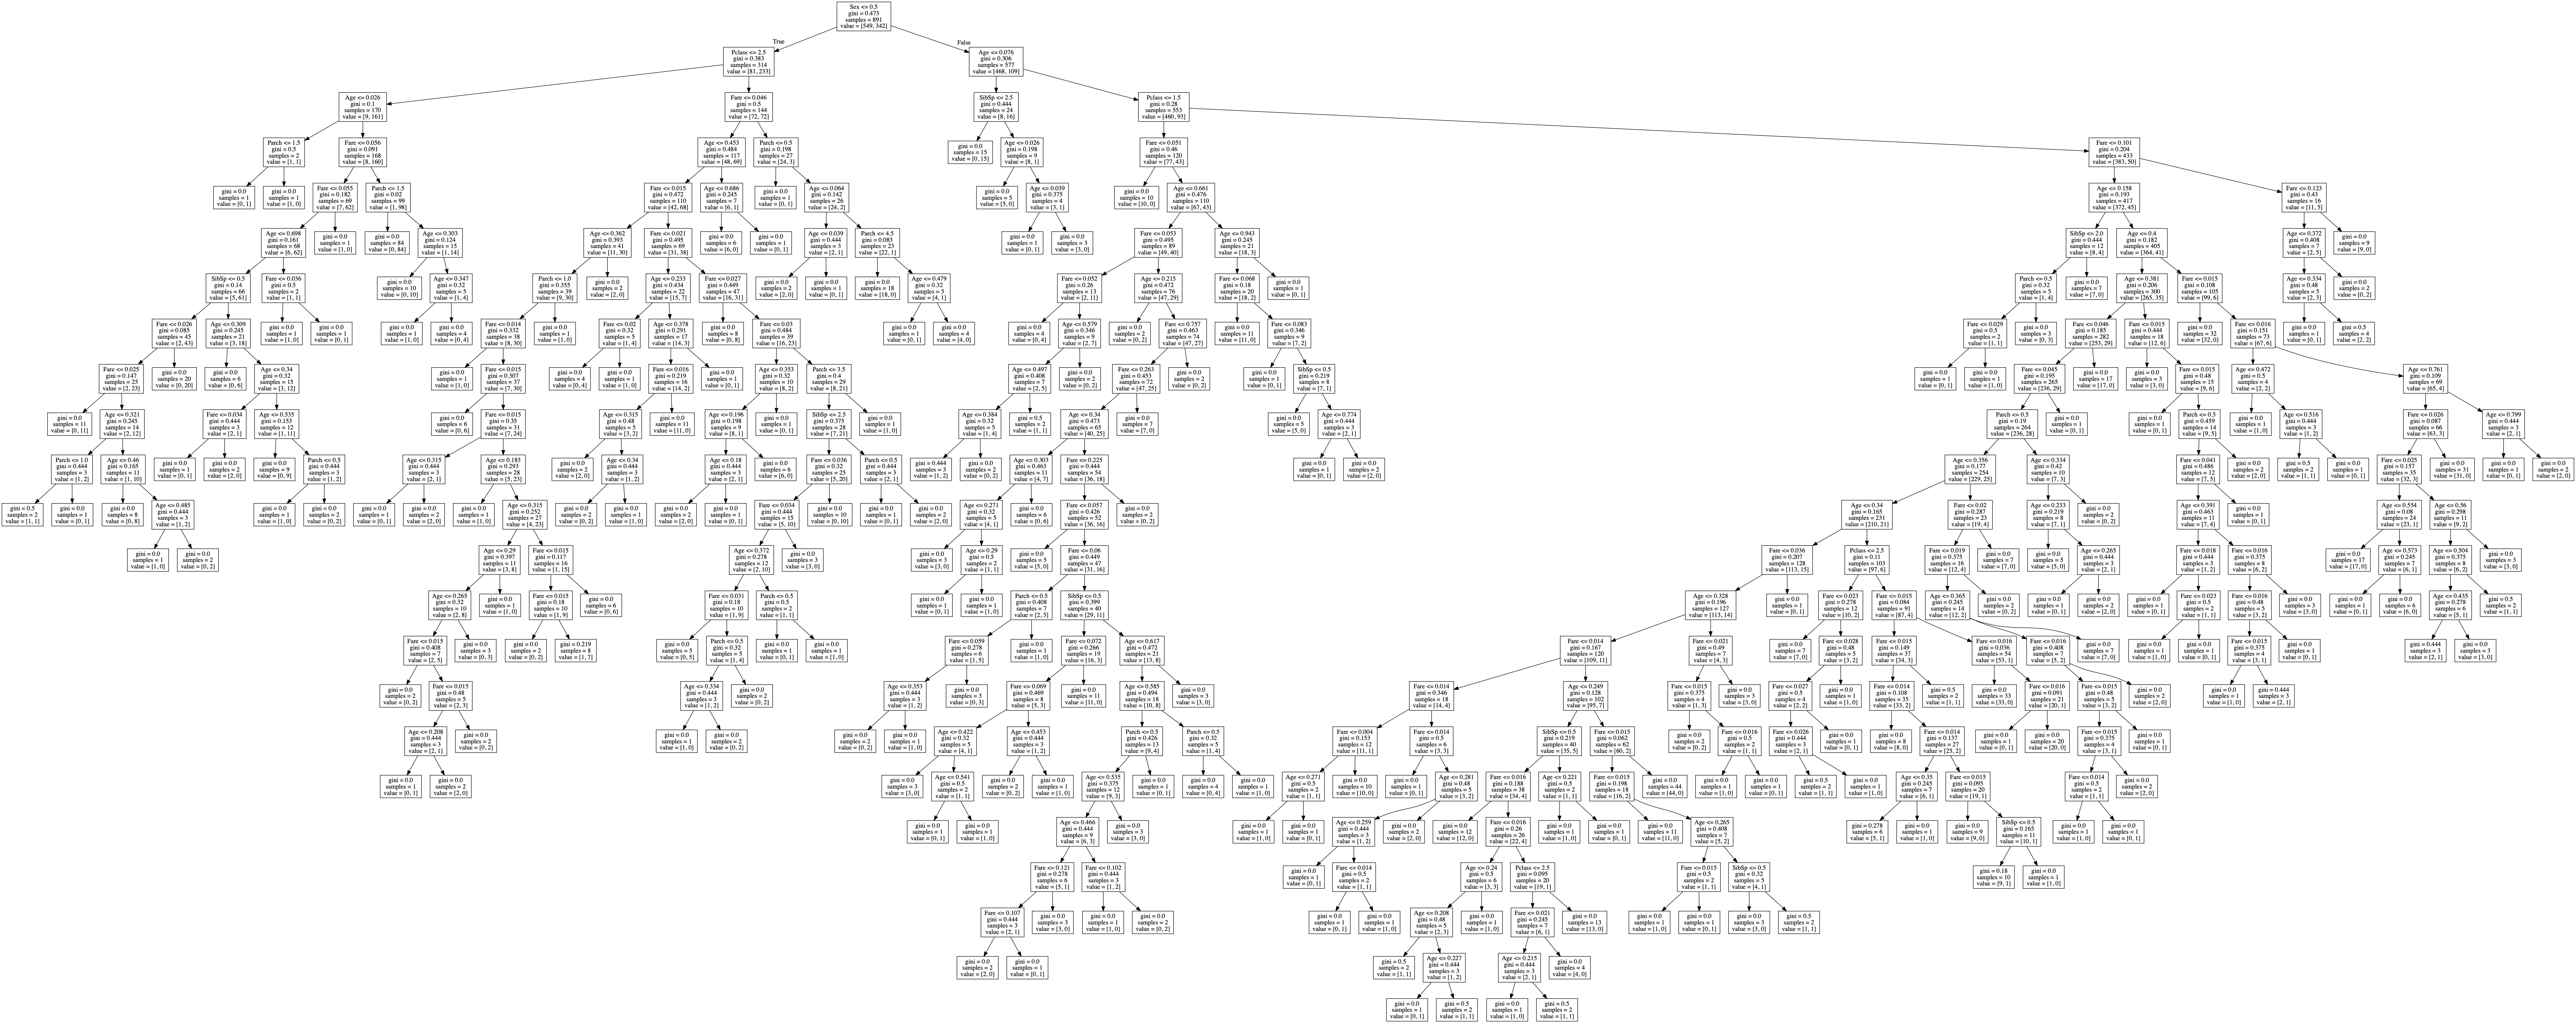

In [46]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

I did not expect the tree to be this complex

Now that the tree has been visualized, we could use the random tree forest to predict other inputs (like yours!)

In [48]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(n_estimators = 10)
clfr = clfr.fit(X,Y)

Time to predict! Just remember these:
Pclass	Sex	Age	SibSp	Parch	Fare

In [50]:
print(clf.predict([[1, 1, 20, 2, 2, 10]]))

[1]


I have no idea how much the fare should be, so let's take the average.

In [52]:
df_train['Fare'].mean()

32.2042079685746

In [57]:
print(clf.predict([[1, 1, 20, 2, 2, 32]]))

[1]


Probably still survived, but if the class is changed,

In [60]:
print(clf.predict([[2, 1, 20, 2, 2, 32]]))

[0]


More accurate since class is also correlated to the ticket fare price